In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import GPy
import pyro
from BNN_Dropout import NN_Dropout, BNN_Dropout
from BNN_SGDHMC import BNN_SGDHMC
from BNN_SVI import BNN_SVI
from BNN_BBB import BNN_BBB


from Benchmark import RandomNN
from pybnn.bohamiann import Bohamiann

plt.rcParams['figure.figsize'] = (12.0, 8)


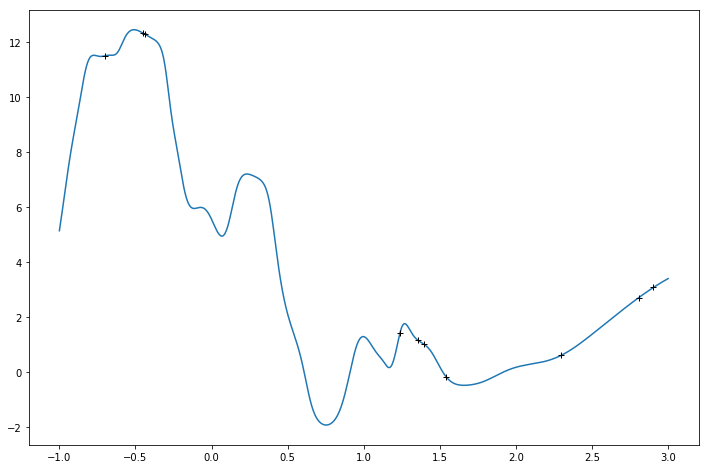

In [24]:
bench = RandomNN(1,3,50,nn.Tanh())
bench.rand_normal_weight(1)
num_plot  = 1000
num_train = 10
x = torch.linspace(-1,3,num_plot)[:,None]
y = bench(x).detach()
train_id = np.random.permutation(num_plot)[:num_train]
train_x = x[train_id]
train_y = y[train_id]
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')

In [29]:
conf = dict()
conf['num_epochs'] = 1600
conf['num_hidden'] = 50
conf['num_layers'] = 3
conf['batch_size'] = 128


conf['dropout_rate'] = 0.01
conf['lr']           = 0.01
conf['tau']          = 1.5 #0.15
conf['lscale']       = 0.25


model = BNN_Dropout(1,nn.Tanh(), conf)

conf_hmc = dict()
hmc_model = BNN_SGDHMC(dim = 1, act = nn.Tanh(), conf = conf_hmc)
kern = GPy.kern.RBF(input_dim = 1)
gp = GPy.models.GPRegression(X=train_x.numpy(), Y= train_y.detach().numpy(), kernel=kern)
gp.likelihood.variance = 1e-2

conf_svi = dict()
conf_svi['num_iters'] = 4000
conf_svi['lr'] = 1e-2
conf_svi['num_layers'] = 1
conf_svi['noise_level'] = 0.05
svi_model = BNN_SVI(dim = 1, act = nn.Tanh(), conf = conf_svi)

conf_bbb                = dict()
conf_bbb['num_epochs']  = 4000
conf_bbb['batch_size']  = 25
conf_bbb['num_layers']  = 1
conf_bbb['print_every'] = 50
conf_bbb['lr']          = 1e-2
conf_bbb['n_samples']   = 4
conf_bbb['noise_level'] = 0.05
bbb_model                   = BNN_BBB(dim = 1, act = nn.Tanh(), conf = conf_bbb)

In [30]:
bbb_model.train(train_x,train_y)
svi_model.train(train_x, train_y)
hmc_model.train(train_x, train_y)
model.train(train_x, train_y)
gp.optimize()

[Epoch    50, loss = 270.082]
[Epoch   100, loss = 182.12]
[Epoch   150, loss = 259.641]
[Epoch   200, loss = 154.878]
[Epoch   250, loss = 94.1867]
[Epoch   300, loss = 70.1749]
[Epoch   350, loss = 89.4589]
[Epoch   400, loss = 121.944]
[Epoch   450, loss = 63.2723]
[Epoch   500, loss = 59.0138]
[Epoch   550, loss = 39.6451]
[Epoch   600, loss = 49.5521]
[Epoch   650, loss = 40.4938]
[Epoch   700, loss = 42.6334]
[Epoch   750, loss = 35.0426]
[Epoch   800, loss = 39.1751]
[Epoch   850, loss = 27.5126]
[Epoch   900, loss = 31.9809]
[Epoch   950, loss = 29.0321]
[Epoch  1000, loss = 22.9955]
[Epoch  1050, loss = 19.452]
[Epoch  1100, loss = 38.1303]
[Epoch  1150, loss = 19.7854]
[Epoch  1200, loss = 18.9659]
[Epoch  1250, loss = 27.8063]
[Epoch  1300, loss = 28.9508]
[Epoch  1350, loss = 22.4119]
[Epoch  1400, loss = 31.8018]
[Epoch  1450, loss = 18.8098]
[Epoch  1500, loss = 20.0133]
[Epoch  1550, loss = 18.3145]
[Epoch  1600, loss = 39.3458]
[Epoch  1650, loss = 20.9846]
[Epoch  1700

Step      100 : NLL =  1.0324e+03 MSE = 4.9102e+01 Time =  0.46
Step      200 : NLL =  1.3020e+03 MSE = 4.8927e+01 Time =  0.95
Step      300 : NLL =  1.6136e+03 MSE = 4.9640e+01 Time =  1.42
Step      400 : NLL =  2.0201e+03 MSE = 5.0041e+01 Time =  1.88
Step      500 : NLL =  2.3830e+03 MSE = 4.8871e+01 Time =  2.34
Step      600 : NLL =  2.9373e+03 MSE = 4.8822e+01 Time =  2.80
Step      700 : NLL =  3.6292e+03 MSE = 4.8748e+01 Time =  3.28
Step      800 : NLL =  4.3767e+03 MSE = 4.9150e+01 Time =  3.75
Step      900 : NLL =  5.3761e+03 MSE = 4.9047e+01 Time =  4.22
Step     1000 : NLL =  6.4731e+03 MSE = 4.9540e+01 Time =  4.67
Step     1100 : NLL =  7.8766e+03 MSE = 4.8948e+01 Time =  5.13
Step     1200 : NLL =  9.4610e+03 MSE = 4.8539e+01 Time =  5.60
Step     1300 : NLL =  1.1921e+04 MSE = 4.9186e+01 Time =  6.07
Step     1400 : NLL =  1.4754e+04 MSE = 4.8629e+01 Time =  6.53
Step     1500 : NLL =  1.7687e+04 MSE = 4.8961e+01 Time =  6.99
Step     1600 : NLL =  2.1427e+04 MSE = 

 /mnt/c/code/pybnn/pybnn/bohamiann.py:119: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Step     2100 : NLL =  5.0460e+04 MSE = 4.9348e+01 Samples= 1 Time =  9.71
Step     2200 : NLL =  8.7356e+03 MSE = 4.8988e+01 Samples= 3 Time = 10.11
Step     2300 : NLL =  8.6284e+03 MSE = 4.9058e+01 Samples= 5 Time = 10.49
Step     2400 : NLL =  8.1060e+03 MSE = 4.8994e+01 Samples= 7 Time = 10.87
Step     2500 : NLL =  8.4694e+03 MSE = 4.9000e+01 Samples= 9 Time = 11.27
Step     2600 : NLL =  9.1238e+03 MSE = 4.9033e+01 Samples= 11 Time = 11.67
Step     2700 : NLL =  9.5266e+03 MSE = 4.9053e+01 Samples= 13 Time = 12.06
Step     2800 : NLL =  1.0014e+04 MSE = 4.9087e+01 Samples= 15 Time = 12.55
Step     2900 : NLL =  1.0705e+04 MSE = 4.9109e+01 Samples= 17 Time = 12.94
Step     3000 : NLL =  1.1167e+04 MSE = 4.9130e+01 Samples= 19 Time = 13.35
Step     3100 : NLL =  1.1583e+04 MSE = 4.9141e+01 Samples= 21 Time = 13.74
Step     3200 : NLL =  1.2196e+04 MSE = 4.9145e+01 Samples= 23 Time = 14.14
Step     3300 : NLL =  1.2832e+04 MSE = 4.9152e+01 Samples= 25 Time = 14.52
Step     3400 : N

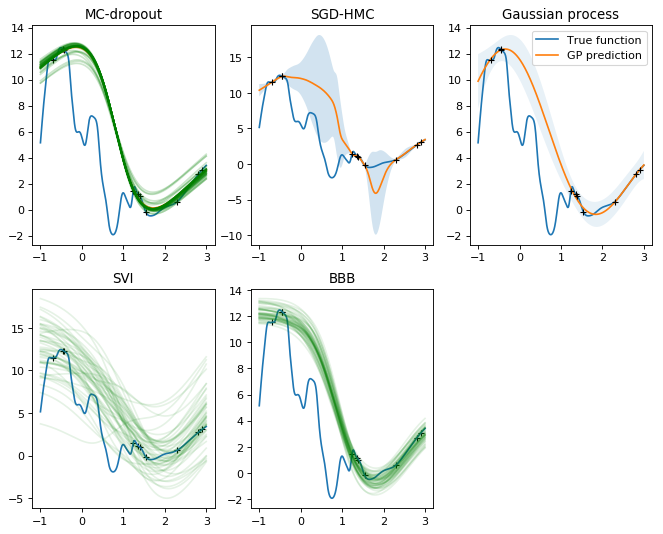

In [31]:
#py = model.predict(x)
py,pv = model.predict_mv(x)
ps = torch.sqrt(pv)
m_hmc,v_hmc = hmc_model.predict_mv(x)
m_hmc = m_hmc.detach().numpy().reshape(num_plot)
s_hmc   = v_hmc.sqrt().detach().numpy().reshape(num_plot)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')


plt.subplot(231)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(),py.detach().numpy(),label = 'Pred')
plt.fill_between(
    x.numpy().reshape(num_plot), 
    (py - ps).reshape(num_plot).detach().numpy(), 
    (py + ps).reshape(num_plot).detach().numpy(), alpha = 0.0)
for i in range(50):
    net = model.sample()
    py  = net((x - model.x_mean) / model.x_std) * model.y_std + model.y_mean
    plt.plot(x.numpy(),py.detach().numpy(), 'g', alpha = 0.2)
plt.title('MC-dropout')

plt.subplot(232)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(x.numpy(), m_hmc)
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.fill_between(x.numpy().reshape(num_plot), m_hmc +3* s_hmc, m_hmc -3* s_hmc, alpha = 0.2)
plt.title('SGD-HMC')

plt.subplot(233)
gp_m, gp_v = gp.predict(x.numpy())
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')
plt.plot(x.numpy(), gp_m, label = 'GP prediction')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.fill_between(x.numpy().reshape(num_plot), (gp_m - 3 * np.sqrt(gp_v)).reshape(num_plot), (gp_m + 3 * np.sqrt(gp_v)).reshape(num_plot), alpha = 0.1)
plt.legend()
plt.title('Gaussian process')


plt.subplot(234)
plt.title('SVI')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')

num_samples = 50;
for i in range(50):
    r_net = svi_model.sample()
    py     = svi_model.sample_predict(r_net,x)
    plt.plot(x.numpy(), py.detach().numpy(),'g',alpha = 0.1)
    
plt.subplot(235)
plt.title('BBB')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')

num_samples = 50;
for i in range(50):
    py     = bbb_model.nn((x - bbb_model.x_mean) / bbb_model.x_std) * bbb_model.y_std + bbb_model.y_mean
    plt.plot(x.numpy(), py.detach().numpy(),'g',alpha = 0.1)

In [13]:
xs = torch.linspace(-10,10,1000)
f = nn.Softplus()

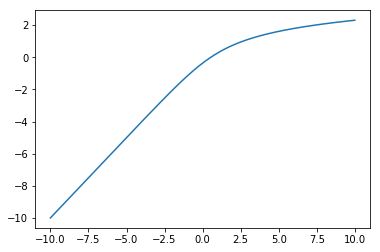

In [18]:
plt.plot(xs.numpy(), f(xs).log().detach().numpy())

In [16]:
f(xs).min()

tensor(4.5399e-05)